# Overview
<p><p><p><p><p><p><p><p>



---

## Detour


---

## Benoît and the Beast



In [4]:
%use lib-ext(0.12.0-93)
LATEX("z_{n+1} = z_n^2 + c")

 a complex number c is a member of the [Mandelbrot](https://en.wikipedia.org/wiki/Mandelbrot_set#cite_note-13) set if, when starting with z0 = 0 and applying the iteration repeatedly, the absolute value of zn remains bounded for all n>0
 ![Mandelbrot](https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Mandel_zoom_00_mandelbrot_set.jpg/480px-Mandel_zoom_00_mandelbrot_set.jpg)
 ![Mandelbrot seahorse valley](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Mandel_zoom_01_head_and_shoulder.jpg/480px-Mandel_zoom_01_head_and_shoulder.jpg)
 ![Mandelbrot seahorse antenna](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Mandel_zoom_08_satellite_antenna.jpg/480px-Mandel_zoom_08_satellite_antenna.jpg)


## Lindenmayer



In [7]:
import net.maiatoday.forestwalk.lsystem.plant

val p = plant {
    seed = "F"
    rules = mapOf(
        "F" to "F[F]-F+F[--F]+F-F"
    )
}
p.grow(2)
p.bluePrint

F[F]-F+F[--F]+F-F[F[F]-F+F[--F]+F-F]-F[F]-F+F[--F]+F-F+F[F]-F+F[--F]+F-F[--F[F]-F+F[--F]+F-F]+F[F]-F+F[--F]+F-F-F[F]-F+F[--F]+F-F

---

## Turtle Tortoise Terrapin
![TurtleTortoiseTerrapin](https://africageographic.com/wp-content/uploads/2019/02/Decoding-Science-Turtle-tortoise-terrapin.jpg)
Turtles [vs](https://www.diffen.com/difference/Tortoise_vs_Turtle) Tortoises [vs](https://africageographic.com/stories/whats-the-difference-between-turtles-tortoises-and-terrapins/) Terrapins


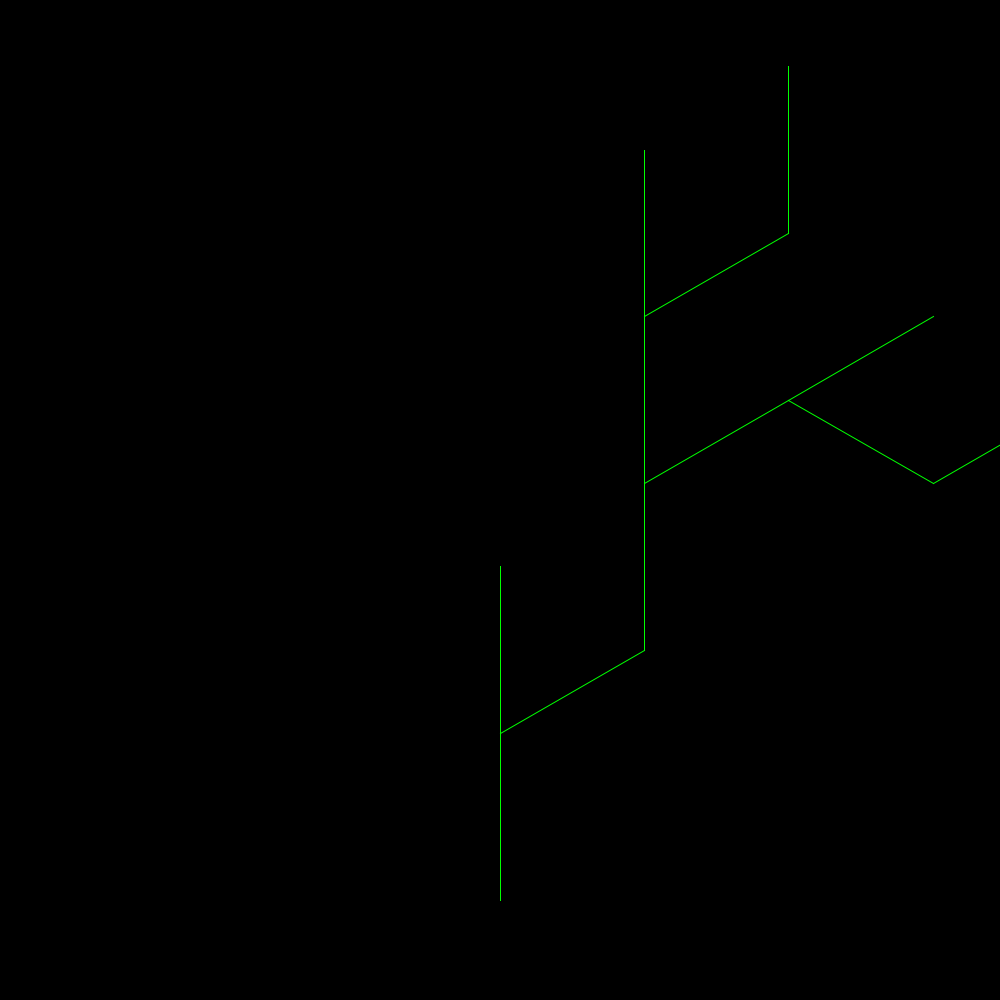

In [8]:
import net.maiatoday.forestwalk.lsystem.tortoiseDraw
import java.awt.image.BufferedImage
import net.maiatoday.forestwalk.lsystem.plant

val p = plant {
    seed = "F"
    rules = mapOf(
        "F" to "F[F]-F+F"
    )
    grow(3)
}

tortoiseDraw(p.bluePrint, p.iterations) 


## Stochastic Squirrel



## Seedlings to Forest



## Share